# Analyze Preemption Times for Saturated Constant Data

In [1]:
import os
%cd ~/Desktop/Research/GPU-research/Preemptions/Xavier

# Constant paths
constant_directory_path = "ConstantData"
constant_paths = []

# List of all files in the directory
for filename in os.listdir(constant_directory_path):
  if filename == '.DS_Store':
    continue
  file_path = os.path.join(constant_directory_path, filename)
  if os.path.isfile(file_path):
      constant_paths.append(file_path)
constant_paths = sorted(constant_paths)


# Shared paths
shared_directory_path = "SetCapacityData"
shared_paths = []

# List of all files in the directory
for filename in os.listdir(shared_directory_path):
  if filename == '.DS_Store':
    continue
  file_path = os.path.join(shared_directory_path, filename)
  if os.path.isfile(file_path):
      shared_paths.append(file_path)
shared_paths = sorted(shared_paths)

# Global memory trial
no_shared_path = 'NoSharedData/LxavierNoSharedTwelve12th.csv'

# No memory trial
clean_path = 'CleanCache/xavierNoMemory1.csv'

/Users/alexgeorgiev/Desktop/Research/GPU-research/Preemptions/Xavier


### Read in the data

In [2]:
# Load all of the preemption intervals from the shared memory tests into an array 
# for noSharedPath, sharedPath in zip(no_shared_paths, shared_paths):
import numpy as np
%cd ~/Desktop/Research/GPU-research/Preemptions
from analyzer_functions import *
%cd ~/Desktop/Research/GPU-research/Preemptions/Xavier


def read_ivls(paths, single=False):
  if single:
    data, ivls = data_loader(singlePath=paths, single=True)
    return  np.array(ivls) / 1000
  ivls_array = []
  for path in paths:
    data, ivls = data_loader(singlePath=path, single=True)
    # convert to microseconds
    ivls = np.array(ivls) / 1000
    ivls_array.append(ivls)
  return ivls_array

# Load constant memory preemption intervals
constant_ivls = read_ivls(constant_paths)

# Load global memory preemption intervals
global_ivls = read_ivls(no_shared_path, single=True)

# Load no memory preemption intervals
clean_ivls = read_ivls(clean_path, single=True)

# Load in shared memory preemption intervals
shared_ivls = read_ivls(shared_paths)

/Users/alexgeorgiev/Desktop/Research/GPU-research/Preemptions
/Users/alexgeorgiev/Desktop/Research/GPU-research/Preemptions/Xavier


## Global Memory vs Constant Memory

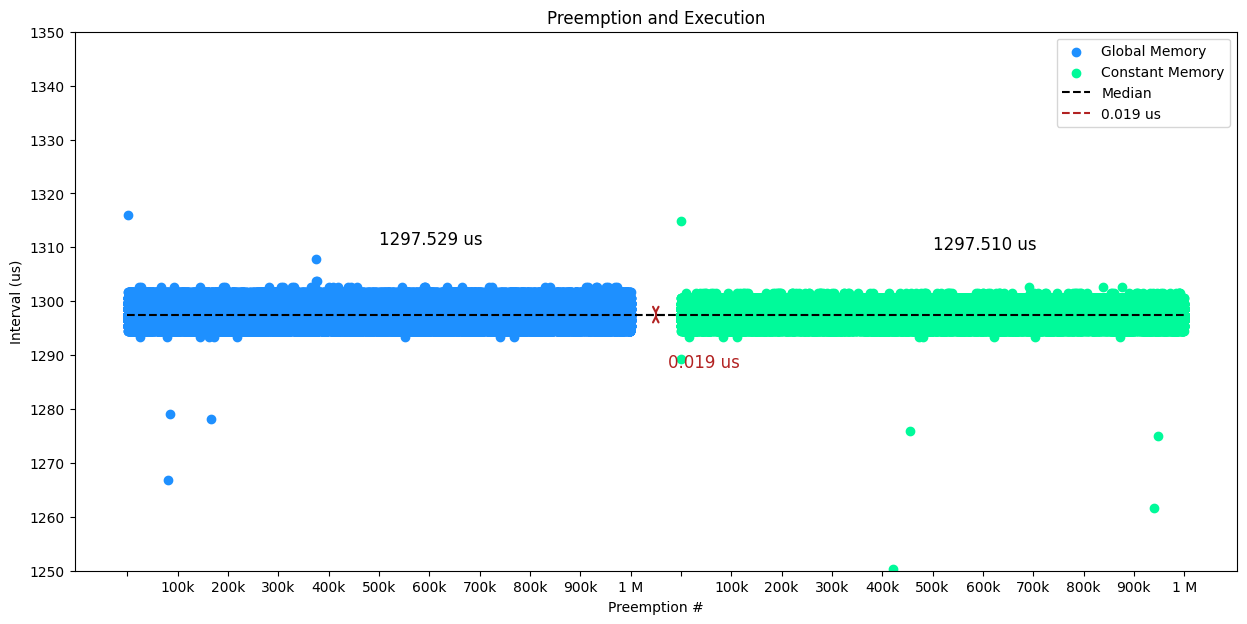

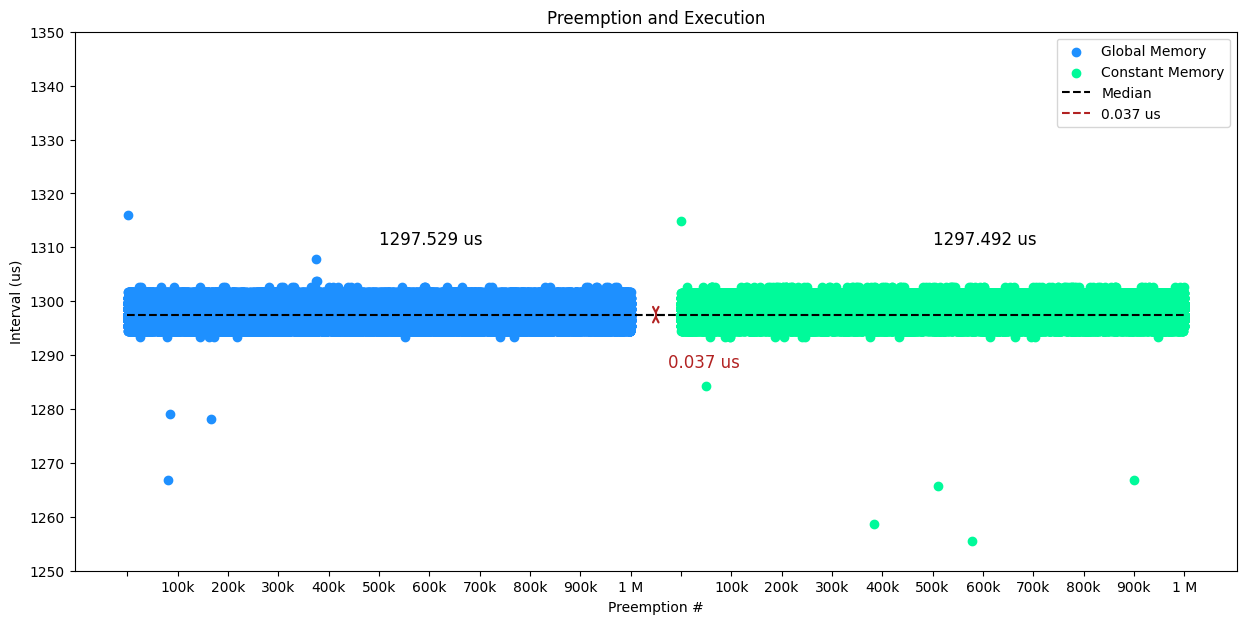

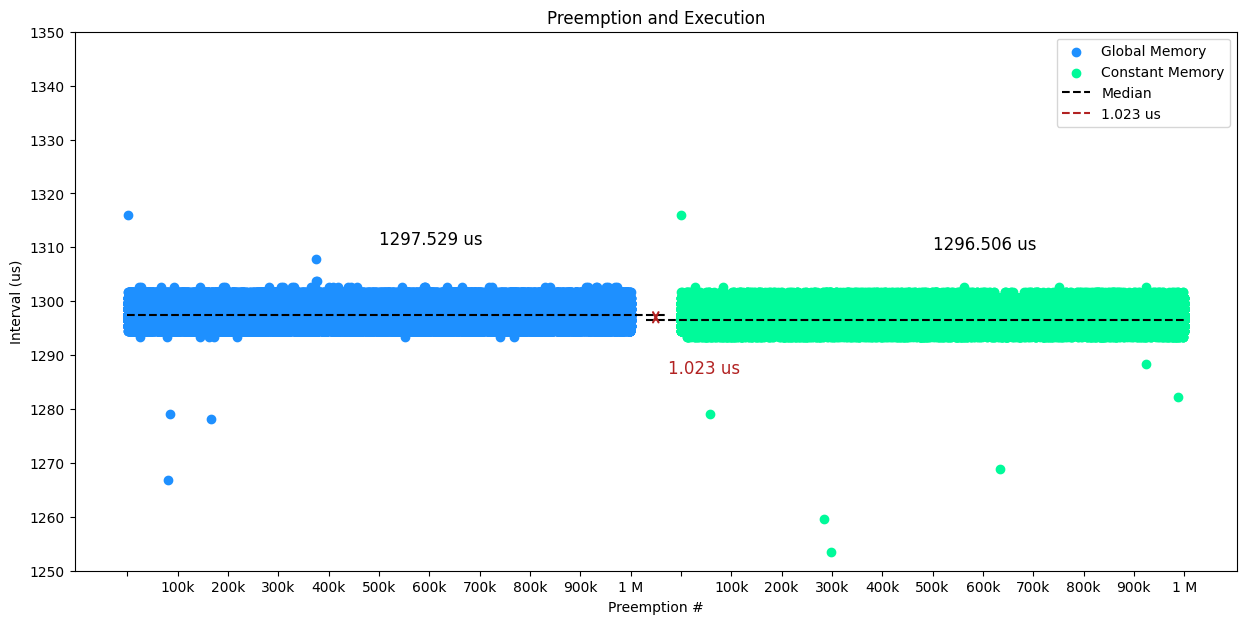

In [3]:
def plot_ivls(left_ivls, right_ivls, left_label, right_label, dual=False):
  NUM_SAMPLES = 1000000
  offset = NUM_SAMPLES // 10
  if dual:
    for left, right in zip(left_ivls, right_ivls):
      plot_side_by_side(noSharedData=left, sharedData=right, NUM_SAMPLES=NUM_SAMPLES, lowerBound=1.25e3, upperBound=1.35e3, 
                        medianLines=True, offset=offset, firstLabel=left_label, secondLabel=right_label)  
  else:
    for ivls in right_ivls:
      plot_side_by_side(noSharedData=left_ivls, sharedData=ivls, NUM_SAMPLES=NUM_SAMPLES, lowerBound=1.25e3, upperBound=1.35e3, 
                        medianLines=True, offset=offset, firstLabel=left_label, secondLabel=right_label)

plot_ivls(global_ivls, constant_ivls, left_label="Global Memory", right_label="Constant Memory")

## No Memory vs Constant Memory

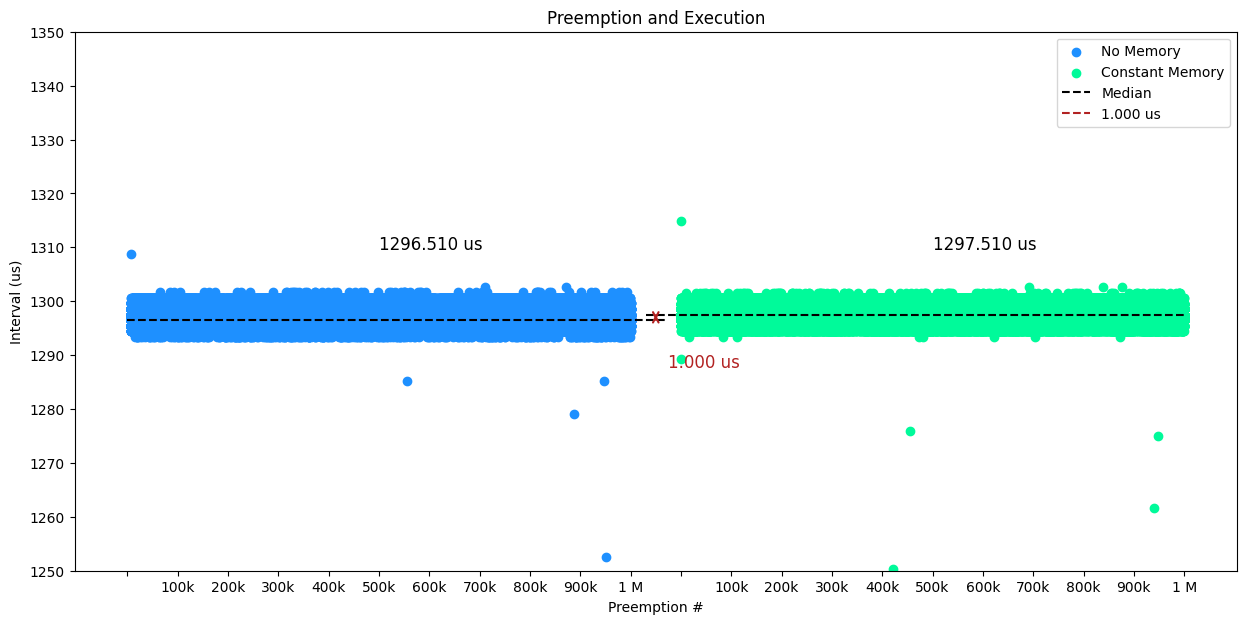

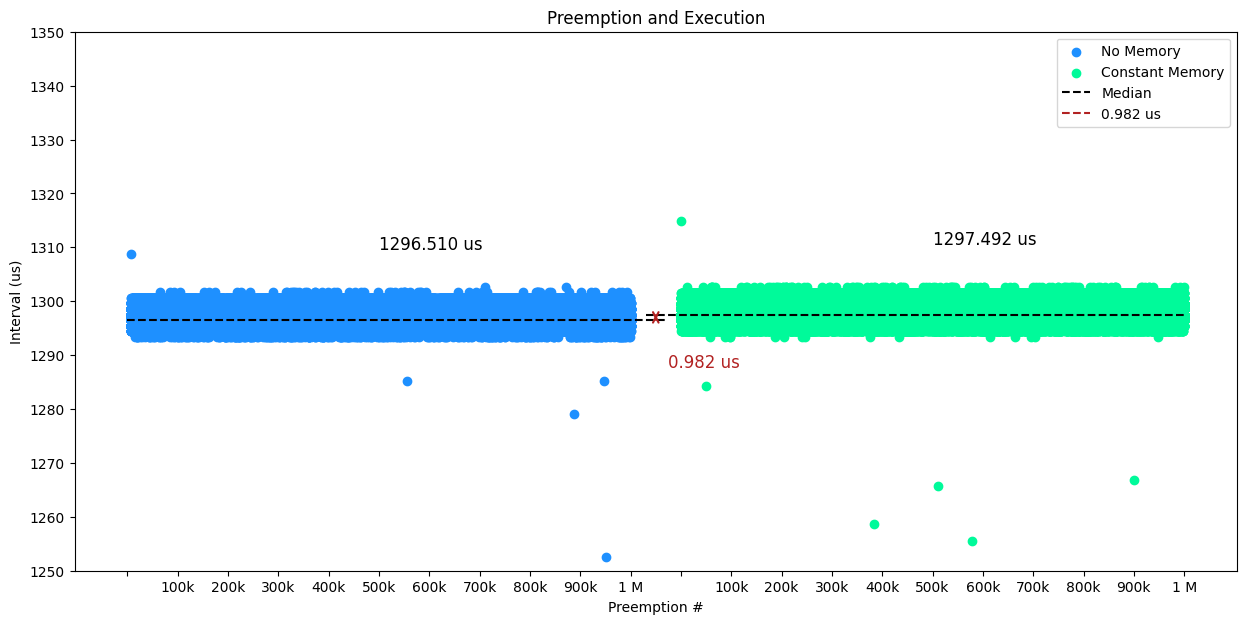

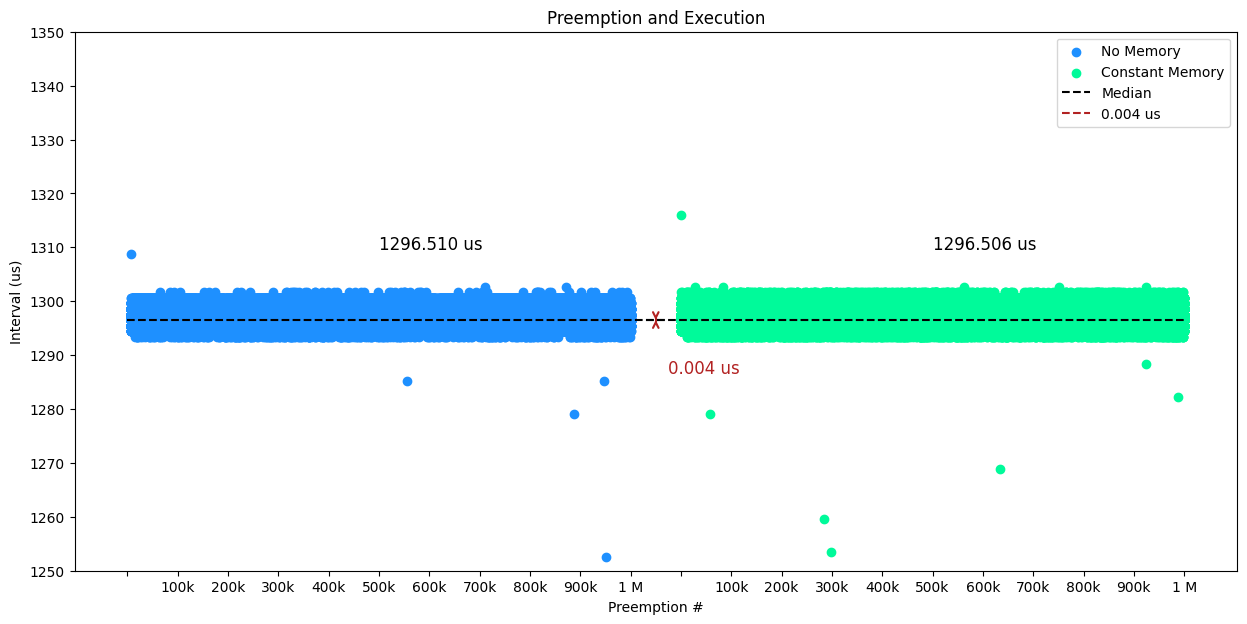

In [4]:
plot_ivls(clean_ivls, constant_ivls, left_label="No Memory", right_label="Constant Memory")

## Shared Memory vs Constant Memory

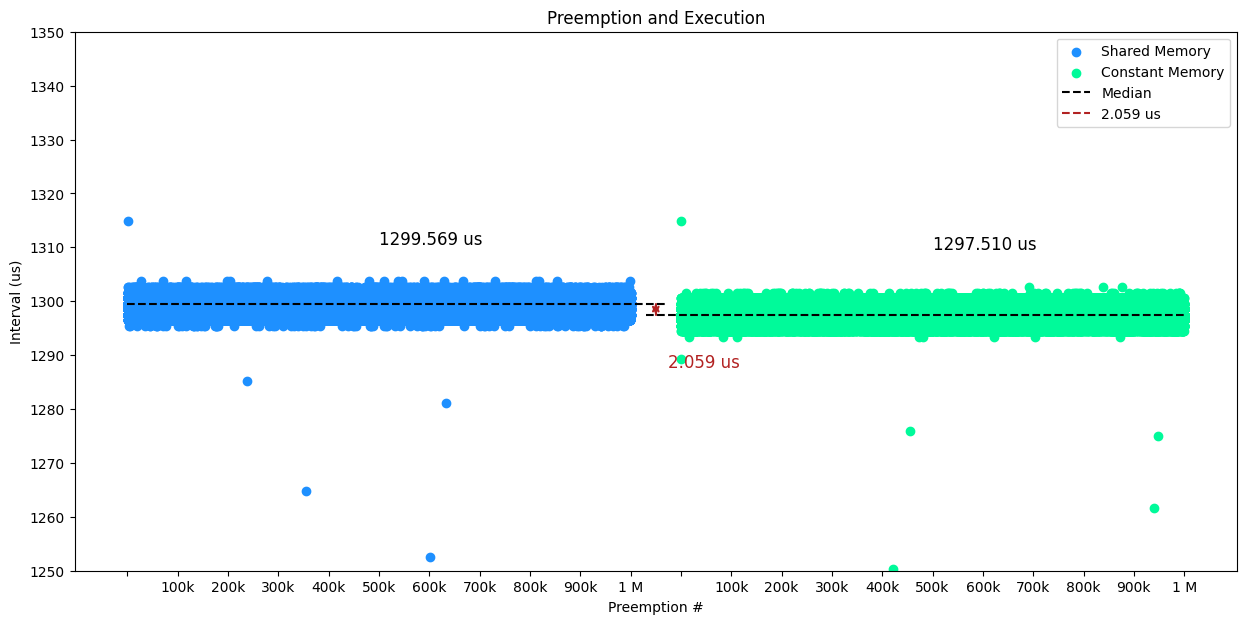

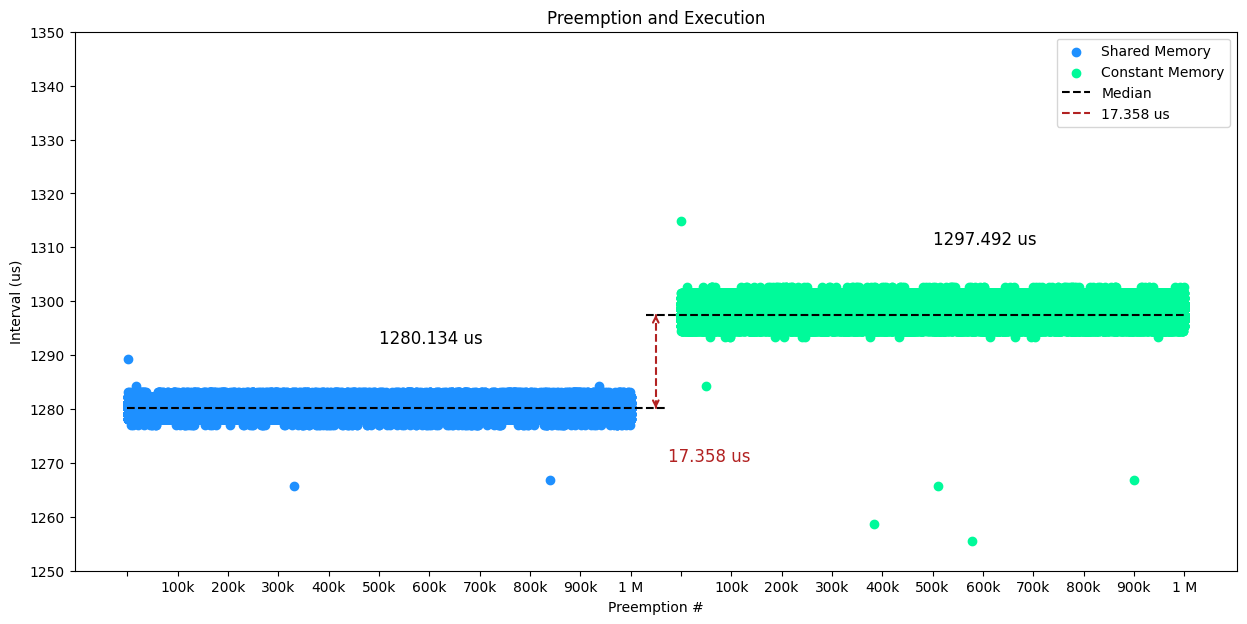

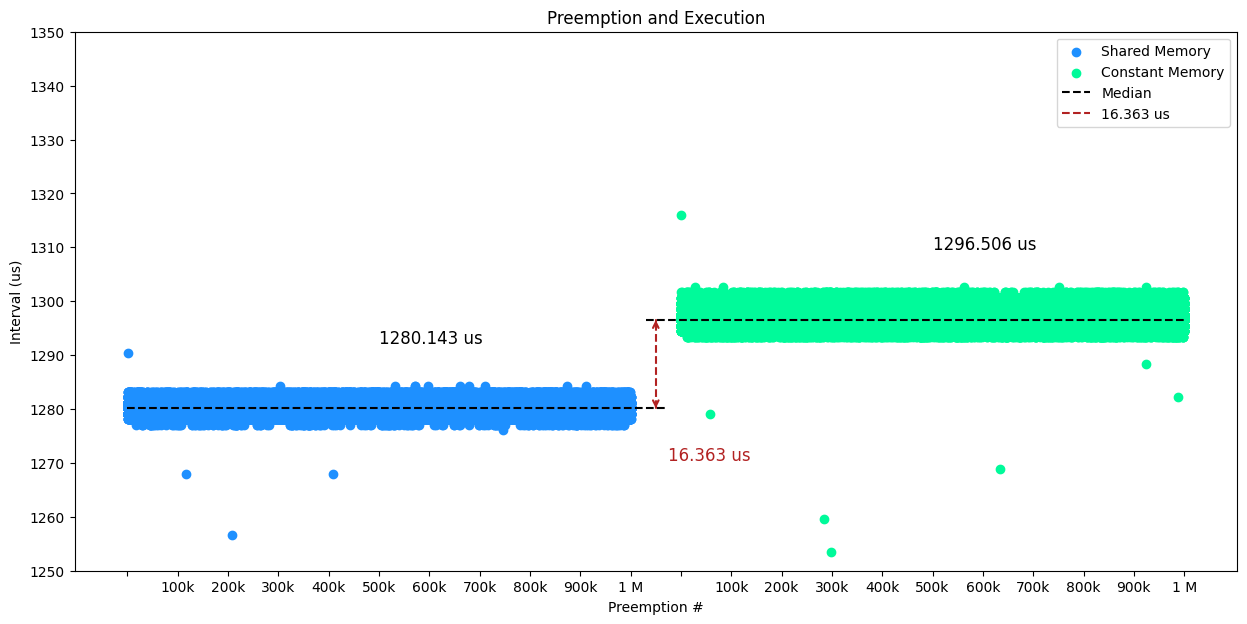

In [5]:
plot_ivls(shared_ivls, constant_ivls, left_label="Shared Memory", right_label="Constant Memory", dual=True)